In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/overstimulation-behavior-and-lifestyle-dataset/overstimulation_dataset.csv


# Step 1: Data Cleaning and Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Loading the dataset

In [3]:
data_path = "/kaggle/input/overstimulation-behavior-and-lifestyle-dataset/overstimulation_dataset.csv"
df = pd.read_csv(data_path)

In [4]:
print("Dataset Information:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset Information:
Number of rows: 2000
Number of columns: 20


In [5]:
print("\nFirst 5 rows of the dataset:")
df.head()



First 5 rows of the dataset:


,Age,Sleep_Hours,Screen_Time,Stress_Level,Noise_Exposure,Social_Interaction,Work_Hours,Exercise_Hours,Caffeine_Intake,Multitasking_Habit,Anxiety_Score,Depression_Score,Sensory_Sensitivity,Meditation_Habit,Overthinking_Score,Irritability_Score,Headache_Frequency,Sleep_Quality,Tech_Usage_Hours,Overstimulated
0,56,7.767825,4.908517,2,0,8,11,2.054411,4,0,6,8,3,1,1,8,1,2,8.746524,0
1,46,4.270068,8.413936,9,4,4,10,2.513216,3,1,4,4,2,1,5,5,2,4,8.508448,1
2,32,6.676144,1.688213,5,2,8,12,2.123108,2,1,4,3,2,1,8,7,2,4,5.701592,0
3,25,7.963324,3.315576,7,2,8,13,1.217663,3,1,3,4,0,1,4,4,2,1,9.131087,0
4,38,3.748138,9.899260,5,0,5,4,0.093407,4,0,9,4,0,1,2,9,5,3,2.286433,1


In [6]:
print("\nColumn names and data types:")
df.dtypes


Column names and data types:


Age                      int64
Sleep_Hours            float64
Screen_Time            float64
Stress_Level             int64
Noise_Exposure           int64
Social_Interaction       int64
Work_Hours               int64
Exercise_Hours         float64
Caffeine_Intake          int64
Multitasking_Habit       int64
Anxiety_Score            int64
Depression_Score         int64
Sensory_Sensitivity      int64
Meditation_Habit         int64
Overthinking_Score       int64
Irritability_Score       int64
Headache_Frequency       int64
Sleep_Quality            int64
Tech_Usage_Hours       float64
Overstimulated           int64
dtype: object

# Check for missing values

In [7]:
print("\nChecking for missing values...")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found")


Checking for missing values...
No missing values found


In [8]:
print("\nChecking for duplicate rows...")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Checking for duplicate rows...
Number of duplicate rows: 0


In [9]:
print("\nDataset Summary statistics:")
df.describe()


Dataset Summary statistics:


,Age,Sleep_Hours,Screen_Time,Stress_Level,Noise_Exposure,Social_Interaction,Work_Hours,Exercise_Hours,Caffeine_Intake,Multitasking_Habit,Anxiety_Score,Depression_Score,Sensory_Sensitivity,Meditation_Habit,Overthinking_Score,Irritability_Score,Headache_Frequency,Sleep_Quality,Tech_Usage_Hours,Overstimulated
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,38.700000,6.501131,6.403858,4.989500,2.050500,4.521000,8.920000,1.510789,1.961000,0.514500,4.909000,4.936500,2.062500,0.476500,5.034000,5.101500,2.994000,2.507500,5.536272,0.637500
std,12.070951,2.021518,3.143323,2.630371,1.431074,2.847738,3.141741,0.862808,1.429161,0.499915,2.585549,2.538442,1.441747,0.499572,2.555016,2.547831,2.014943,1.104334,2.559542,0.480842
min,18.000000,3.000081,1.000338,1.000000,0.000000,0.000000,4.000000,0.000356,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.014015,0.000000
25%,28.000000,4.763518,3.714882,3.000000,1.000000,2.000000,6.000000,0.760902,1.000000,0.000000,3.000000,3.000000,1.000000,0.000000,3.000000,3.000000,1.000000,2.000000,3.397449,0.000000
50%,39.000000,6.542349,6.311802,5.000000,2.000000,5.000000,9.000000,1.532074,2.000000,1.000000,5.000000,5.000000,2.000000,0.000000,5.000000,5.000000,3.000000,2.000000,5.530601,1.000000
75%,49.000000,8.240834,9.110644,7.000000,3.000000,7.000000,12.000000,2.245614,3.000000,1.000000,7.000000,7.000000,3.000000,1.000000,7.000000,7.000000,5.000000,3.000000,7.711026,1.000000
max,59.000000,9.992248,11.995135,9.000000,4.000000,9.000000,14.000000,2.999450,4.000000,1.000000,9.000000,9.000000,4.000000,1.000000,9.000000,9.000000,6.000000,4.000000,9.998554,1.000000


**Checking for Outliers**

In [10]:
# Detecting Outliers using IQR method
print("\nChecking for outliers using IQR method...")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

outliers_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    if outliers > 0:
        outliers_summary[col] = outliers

print("Number of outliers per column:")
for col, count in outliers_summary.items():
    print(f"{col}: {count} outliers")


Checking for outliers using IQR method...
Number of outliers per column:


In [11]:
# Data consistency
print("\nChecking data consistency...")

# Binary columns have only 0 and 1
binary_cols = ['Multitasking_Habit', 'Meditation_Habit', 'Overstimulated']
for col in binary_cols:
    unique_values = df[col].unique()
    print(f"{col} unique values: {unique_values}")
    if not all(val in [0, 1] for val in unique_values):
        print(f"Warning: {col} contains values other than 0 and 1")


Checking data consistency...
Multitasking_Habit unique values: [0 1]
Meditation_Habit unique values: [1 0]
Overstimulated unique values: [0 1]


In [12]:
print("\nChecking ranges for numerical columns...")
expected_ranges = {
    'Age': (18, 60),
    'Sleep_Hours': (3, 10),
    'Screen_Time': (1, 12),
    'Stress_Level': (1, 10),
    'Noise_Exposure': (0, 5),
    'Social_Interaction': (0, 10),
    'Work_Hours': (4, 15),
    'Exercise_Hours': (0, 3),
    'Caffeine_Intake': (0, 5),
    'Anxiety_Score': (1, 10),
    'Depression_Score': (1, 10),
    'Sensory_Sensitivity': (0, 4),
    'Overthinking_Score': (1, 10),
    'Irritability_Score': (1, 10),
    'Headache_Frequency': (0, 7),
    'Sleep_Quality': (1, 4),
    'Tech_Usage_Hours': (1, 10)
}

for col, (min_val, max_val) in expected_ranges.items():
    if col in df.columns:
        actual_min = df[col].min()
        actual_max = df[col].max()
        print(f"{col}: Expected range [{min_val}, {max_val}], Actual range [{actual_min}, {actual_max}]")
        
        # Check if values are outside expected range
        if actual_min < min_val or actual_max > max_val:
            print(f"Warning: {col} has values outside expected range")
            
            # Cap values to expected range
            df[col] = df[col].clip(lower=min_val, upper=max_val)
            print(f"Values in {col} have been capped to [{min_val}, {max_val}]")


Checking ranges for numerical columns...
Age: Expected range [18, 60], Actual range [18, 59]
Sleep_Hours: Expected range [3, 10], Actual range [3.000081443287563, 9.992248284233035]
Screen_Time: Expected range [1, 12], Actual range [1.0003379072992065, 11.995134735754824]
Stress_Level: Expected range [1, 10], Actual range [1, 9]
Noise_Exposure: Expected range [0, 5], Actual range [0, 4]
Social_Interaction: Expected range [0, 10], Actual range [0, 9]
Work_Hours: Expected range [4, 15], Actual range [4, 14]
Exercise_Hours: Expected range [0, 3], Actual range [0.00035593473255, 2.9994501580880333]
Caffeine_Intake: Expected range [0, 5], Actual range [0, 4]
Anxiety_Score: Expected range [1, 10], Actual range [1, 9]
Depression_Score: Expected range [1, 10], Actual range [1, 9]
Sensory_Sensitivity: Expected range [0, 4], Actual range [0, 4]
Overthinking_Score: Expected range [1, 10], Actual range [1, 9]
Irritability_Score: Expected range [1, 10], Actual range [1, 9]
Headache_Frequency: Expe

# Exploratory Data Analysis

In [13]:
from scipy import stats

# Style for visualizations
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

Analyzing distribution of target variable (Overstimulated)...


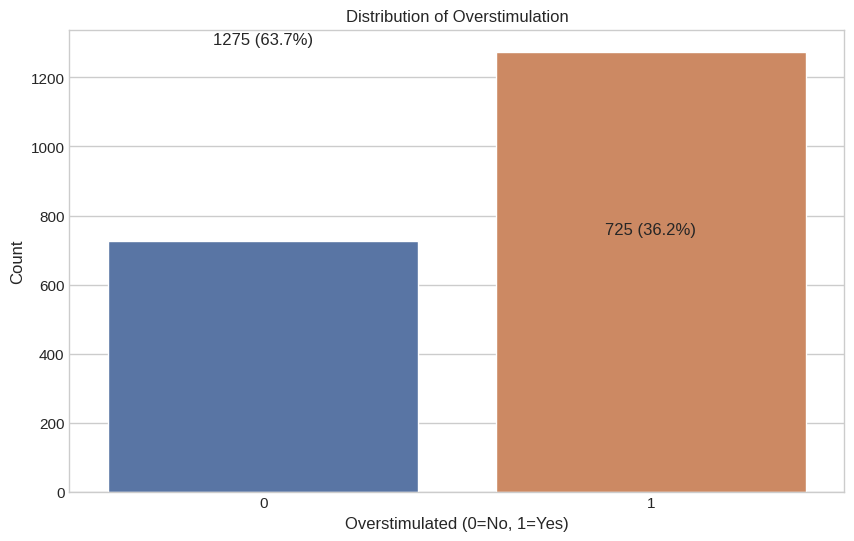

In [14]:
# Distribution of target variable
print("Analyzing distribution of target variable (Overstimulated)...")
plt.figure(figsize=(10, 6))
overstimulated_counts = df['Overstimulated'].value_counts()
sns.countplot(x='Overstimulated', data=df)
plt.title('Distribution of Overstimulation')
plt.xlabel('Overstimulated (0=No, 1=Yes)')
plt.ylabel('Count')
for i, count in enumerate(overstimulated_counts):
    plt.text(i, count + 20, f"{count} ({count/len(df)*100:.1f}%)", ha='center')
plt.show()

Analyzing age distribution...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


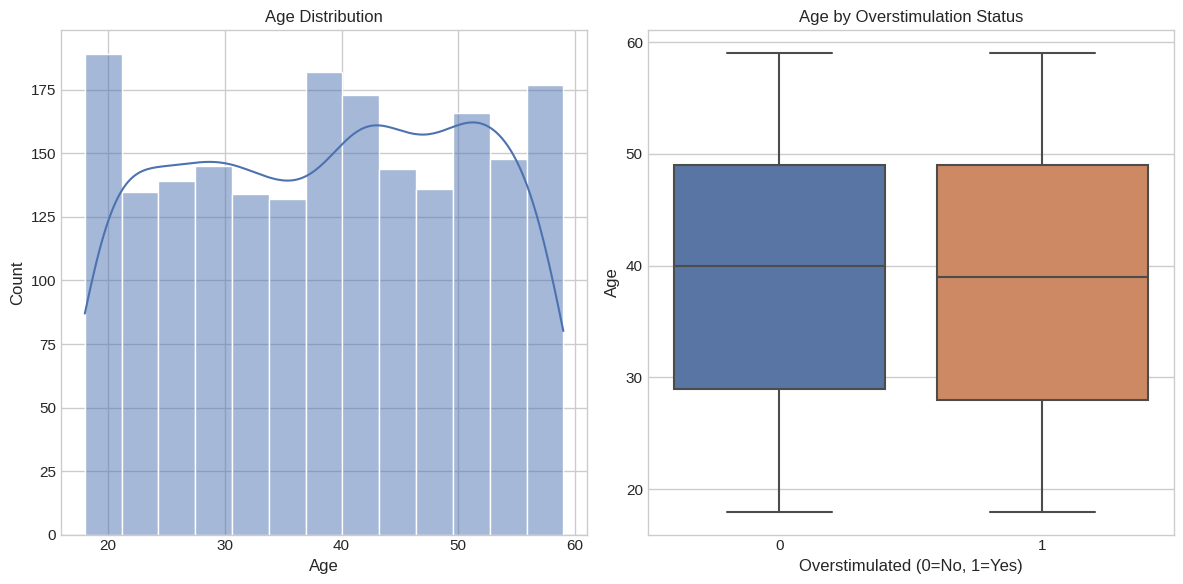

In [15]:
# Distribution of Age
print("Analyzing age distribution...")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='Overstimulated', y='Age', data=df)
plt.title('Age by Overstimulation Status')
plt.xlabel('Overstimulated (0=No, 1=Yes)')
plt.ylabel('Age')
plt.tight_layout()

plt.show()

Analyzing sleep hours distribution...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


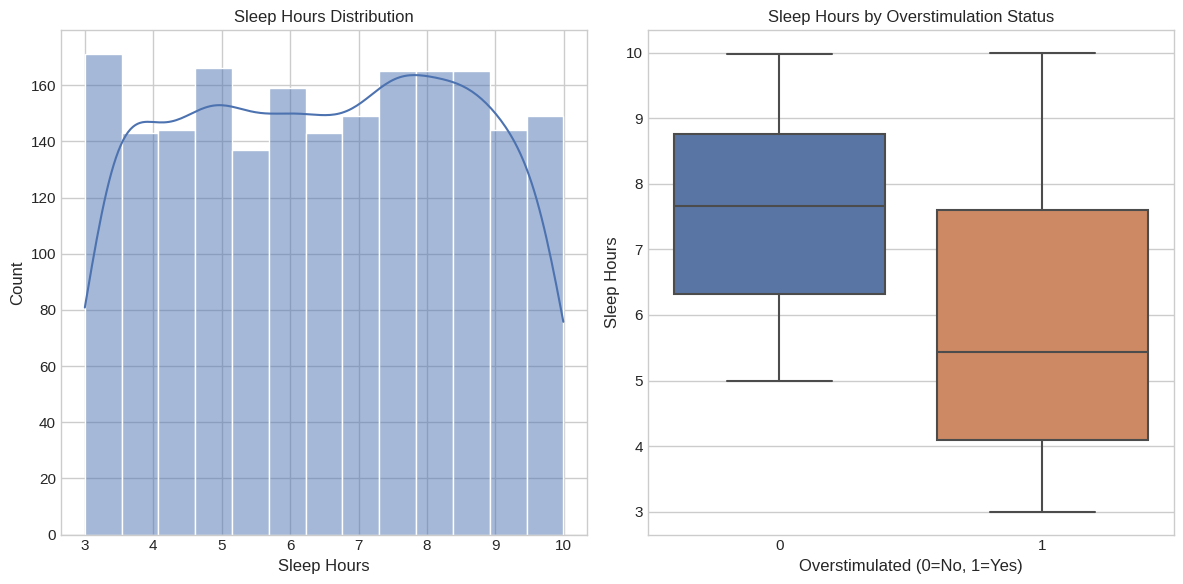

In [16]:
# Sleep Hours distribution
print("Analyzing sleep hours distribution...")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Sleep_Hours'], kde=True)
plt.title('Sleep Hours Distribution')
plt.xlabel('Sleep Hours')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='Overstimulated', y='Sleep_Hours', data=df)
plt.title('Sleep Hours by Overstimulation Status')
plt.xlabel('Overstimulated (0=No, 1=Yes)')
plt.ylabel('Sleep Hours')
plt.tight_layout()

plt.show()

Analyzing screen time distribution...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


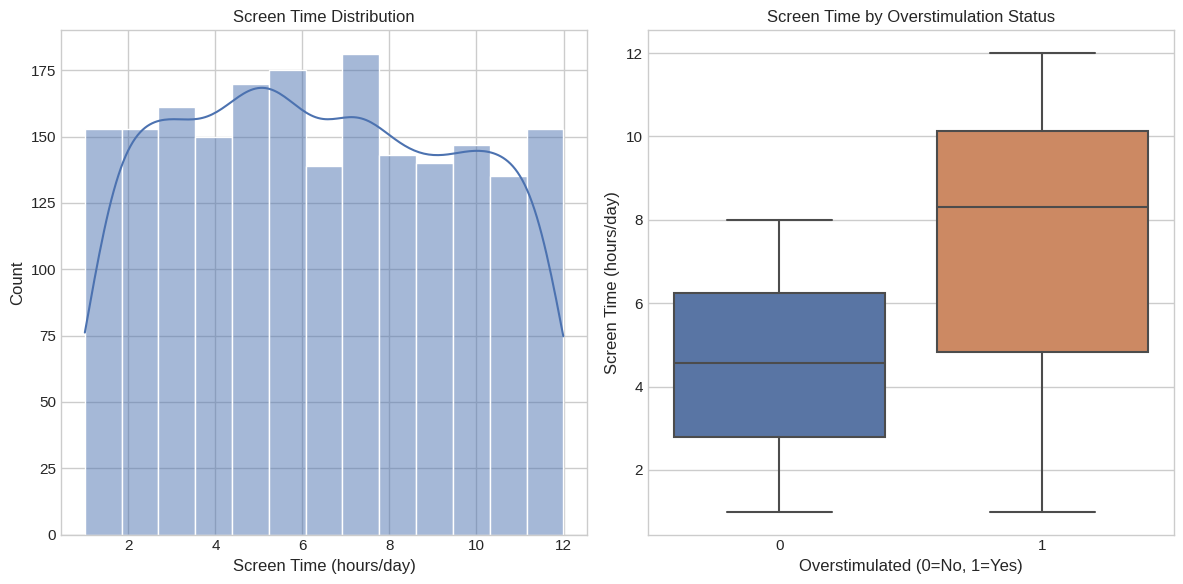

In [17]:
# Screen Time distribution
print("Analyzing screen time distribution...")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Screen_Time'], kde=True)
plt.title('Screen Time Distribution')
plt.xlabel('Screen Time (hours/day)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='Overstimulated', y='Screen_Time', data=df)
plt.title('Screen Time by Overstimulation Status')
plt.xlabel('Overstimulated (0=No, 1=Yes)')
plt.ylabel('Screen Time (hours/day)')
plt.tight_layout()
plt.show()

Analyzing stress level distribution...


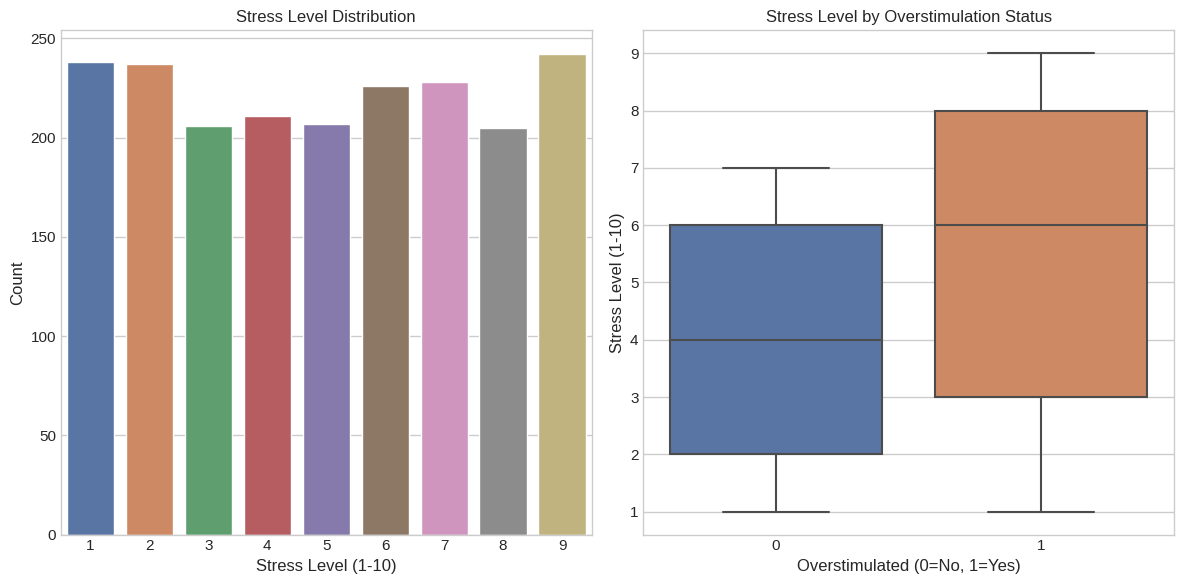

In [18]:
# Stress Level distribution
print("Analyzing stress level distribution...")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Stress_Level', data=df)
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level (1-10)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='Overstimulated', y='Stress_Level', data=df)
plt.title('Stress Level by Overstimulation Status')
plt.xlabel('Overstimulated (0=No, 1=Yes)')
plt.ylabel('Stress Level (1-10)')
plt.tight_layout()
plt.show()

Analyzing exercise hours distribution...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


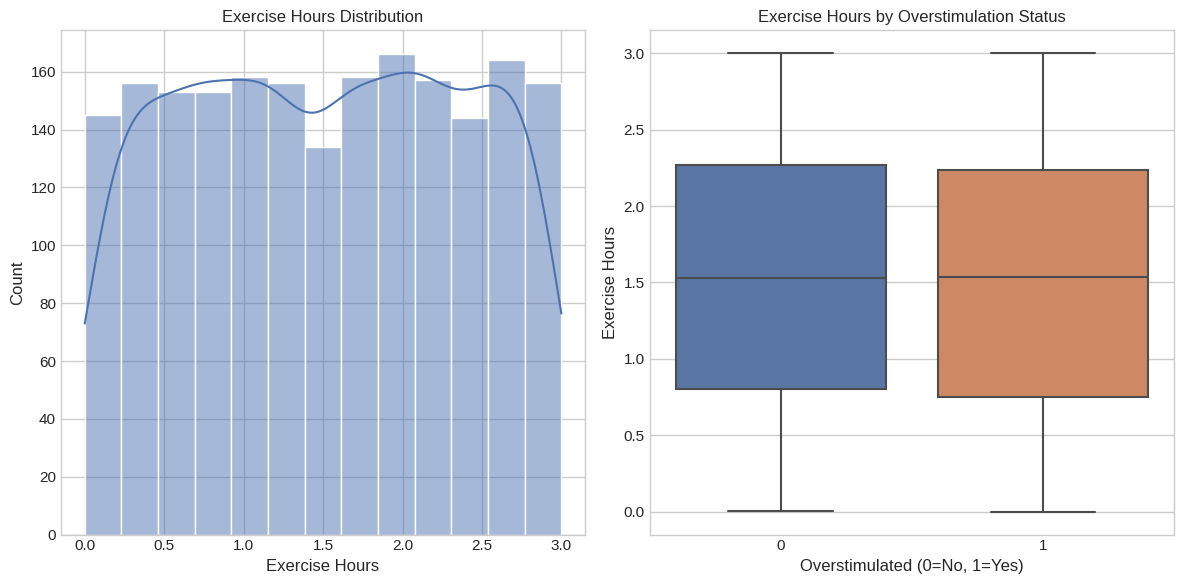

In [19]:
# Exercise Hours distribution
print("Analyzing exercise hours distribution...")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Exercise_Hours'], kde=True)
plt.title('Exercise Hours Distribution')
plt.xlabel('Exercise Hours')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='Overstimulated', y='Exercise_Hours', data=df)
plt.title('Exercise Hours by Overstimulation Status')
plt.xlabel('Overstimulated (0=No, 1=Yes)')
plt.ylabel('Exercise Hours')
plt.tight_layout()
plt.show()

Analyzing multitasking habit distribution...


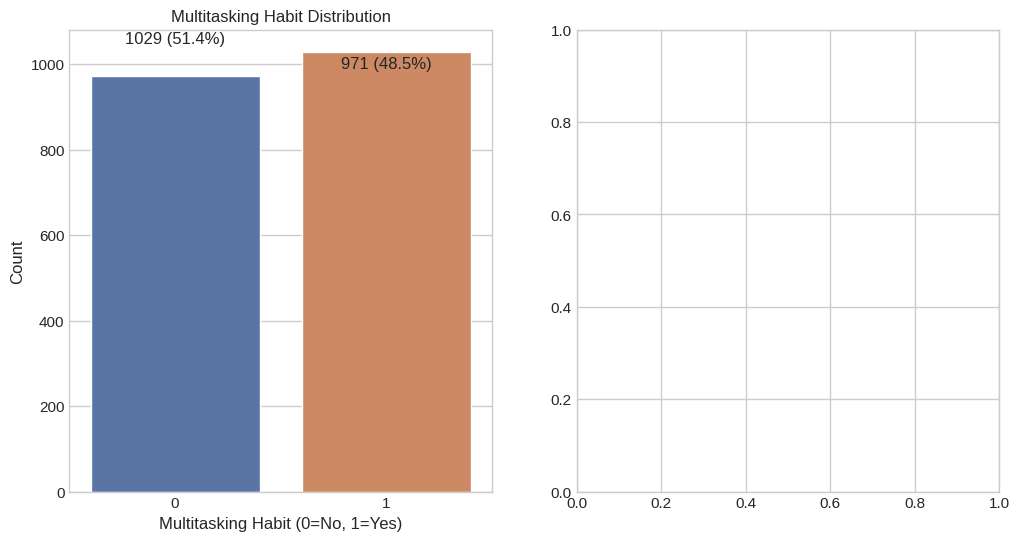

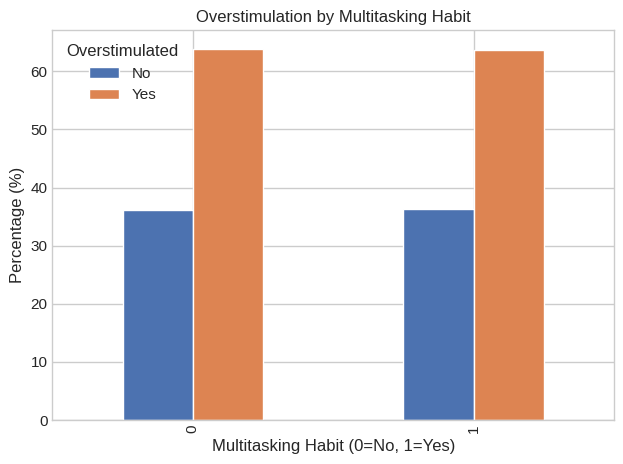

In [20]:
# Multitasking Habit distribution
print("Analyzing multitasking habit distribution...")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
multitasking_counts = df['Multitasking_Habit'].value_counts()
sns.countplot(x='Multitasking_Habit', data=df)
plt.title('Multitasking Habit Distribution')
plt.xlabel('Multitasking Habit (0=No, 1=Yes)')
plt.ylabel('Count')
for i, count in enumerate(multitasking_counts):
    plt.text(i, count + 20, f"{count} ({count/len(df)*100:.1f}%)", ha='center')

plt.subplot(1, 2, 2)
cross_tab = pd.crosstab(df['Multitasking_Habit'], df['Overstimulated'], normalize='index') * 100
cross_tab.plot(kind='bar', stacked=False)
plt.title('Overstimulation by Multitasking Habit')
plt.xlabel('Multitasking Habit (0=No, 1=Yes)')
plt.ylabel('Percentage (%)')
plt.legend(title='Overstimulated', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

Analyzing anxiety and depression score distributions...


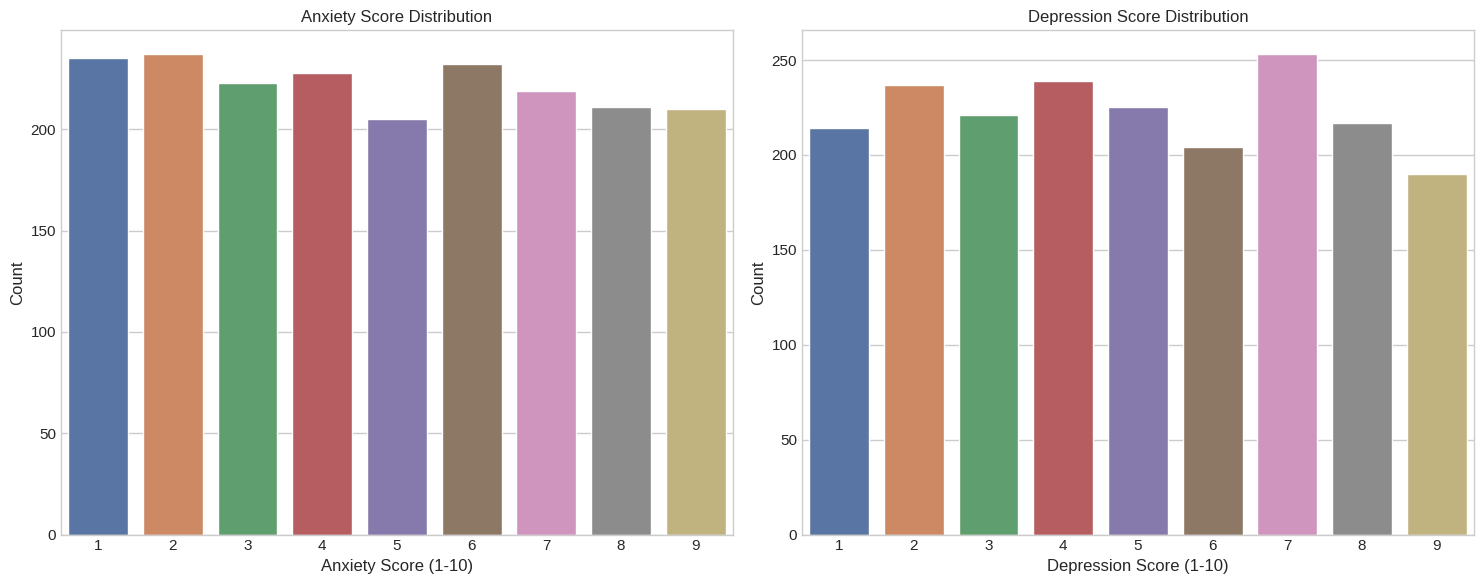

In [21]:
# Anxiety and Depression Score distributions
print("Analyzing anxiety and depression score distributions...")
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Anxiety_Score', data=df)
plt.title('Anxiety Score Distribution')
plt.xlabel('Anxiety Score (1-10)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='Depression_Score', data=df)
plt.title('Depression Score Distribution')
plt.xlabel('Depression Score (1-10)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Creating correlation matrix...


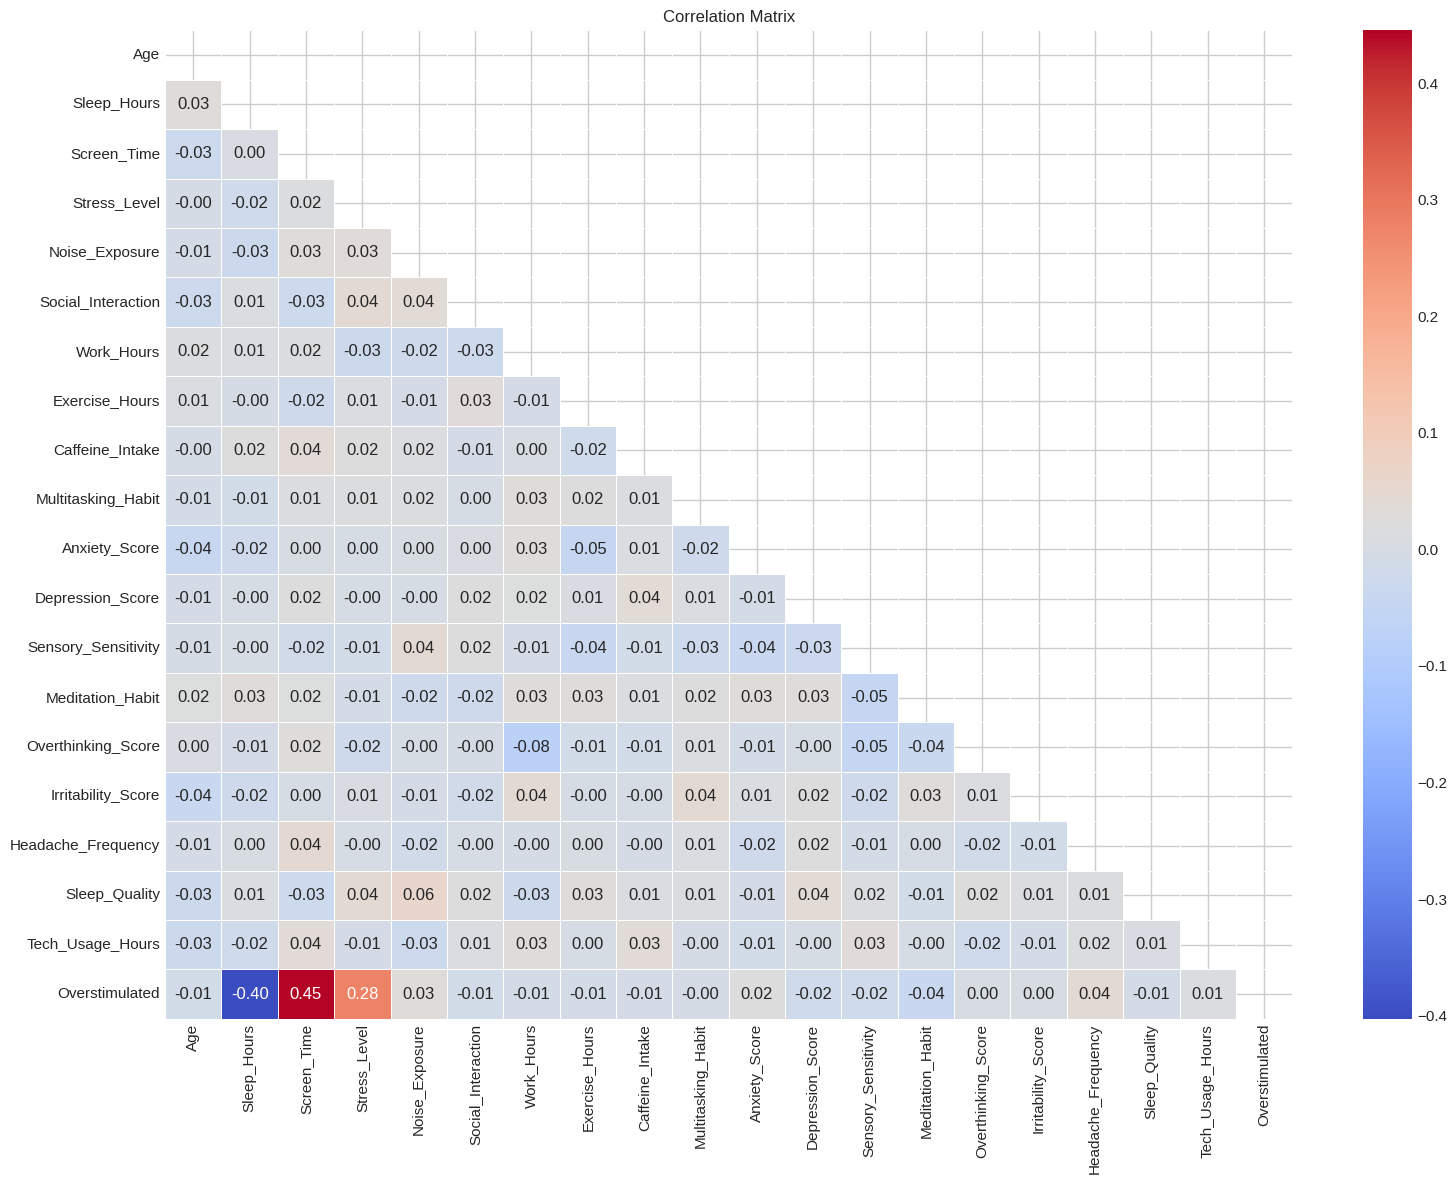

In [22]:
# Correlation matrix
print("Creating correlation matrix...")
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [23]:
correlation_with_target = correlation_matrix['Overstimulated'].sort_values(ascending=False)

# Top 5 correlations with Overstimulation
print("\nTop 5 factors correlated with Overstimulation:")
top_correlations = correlation_with_target.drop('Overstimulated').abs().sort_values(ascending=False).head(5)
for feature, corr in top_correlations.items():
    print(f"{feature}: {correlation_with_target[feature]:.3f}")


Top 5 factors correlated with Overstimulation:
Screen_Time: 0.445
Sleep_Hours: -0.403
Stress_Level: 0.277
Headache_Frequency: 0.043
Meditation_Habit: -0.039


Creating pairplot of top correlated features...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Figure size 1500x1200 with 0 Axes>

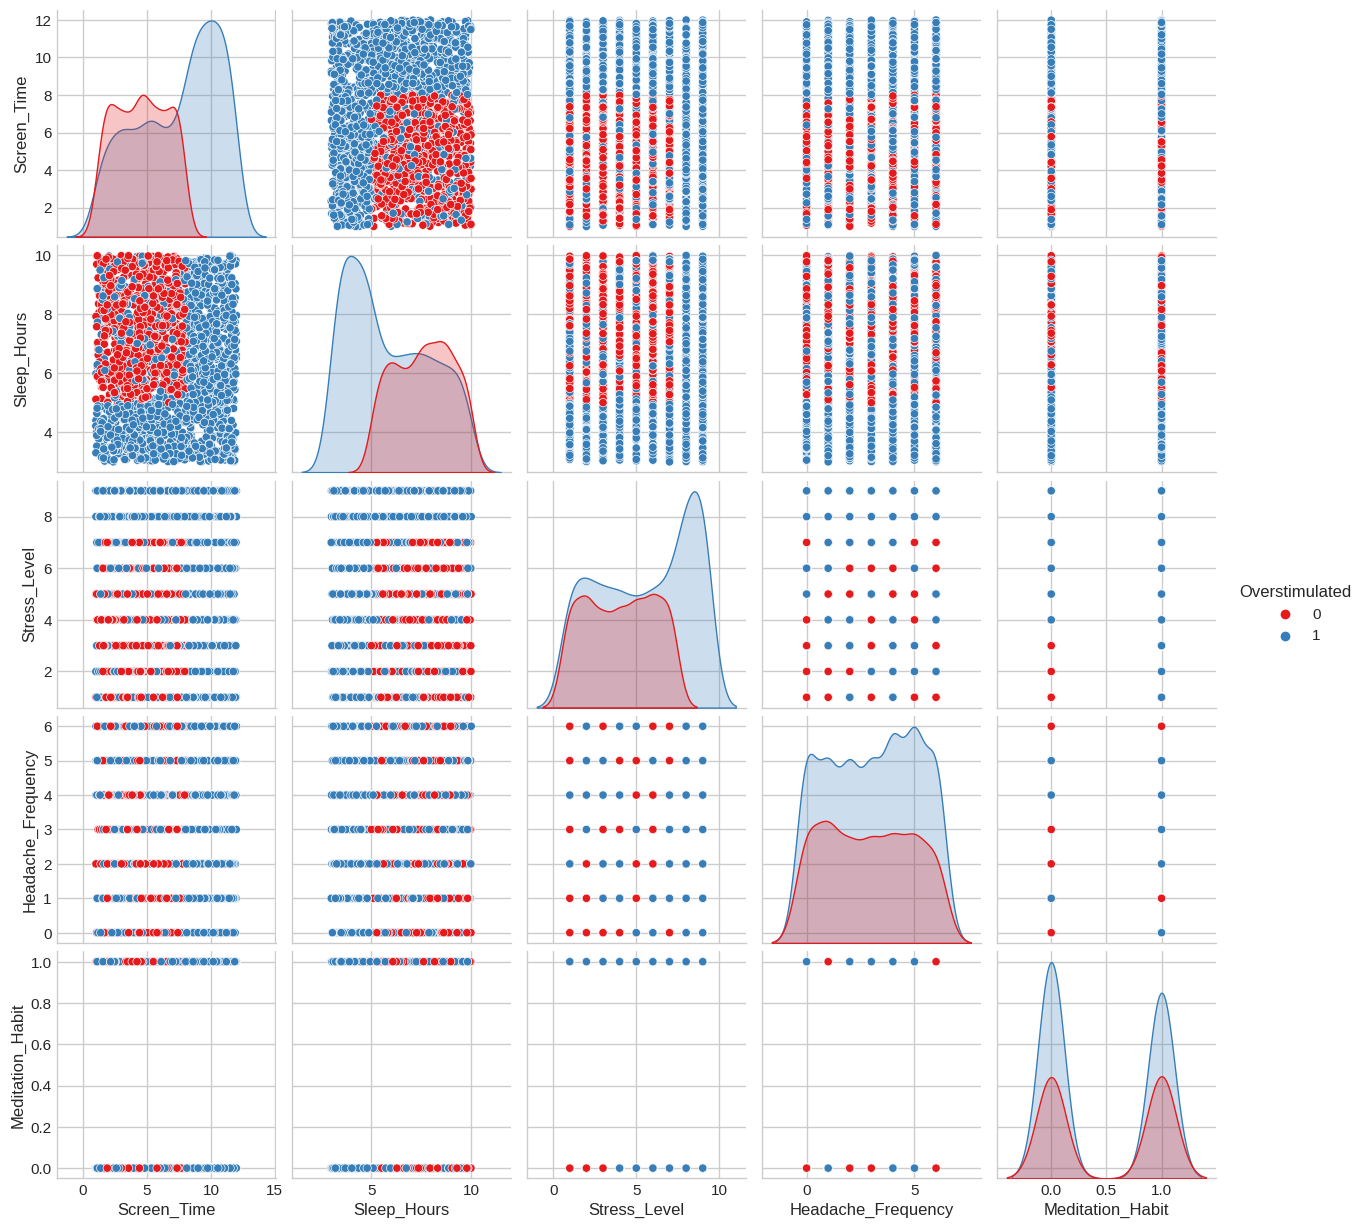

In [24]:
# Pairplot of top correlated features
print("Creating pairplot of top correlated features...")
top_features = top_correlations.index.tolist() + ['Overstimulated']
plt.figure(figsize=(15, 12))
sns.pairplot(df[top_features], hue='Overstimulated', palette='Set1')
plt.show()

*1. How does screen time correlate with cognitive fatigue and stress levels?*

Analyzing relationship between Screen Time, Stress Level, and Overstimulation...


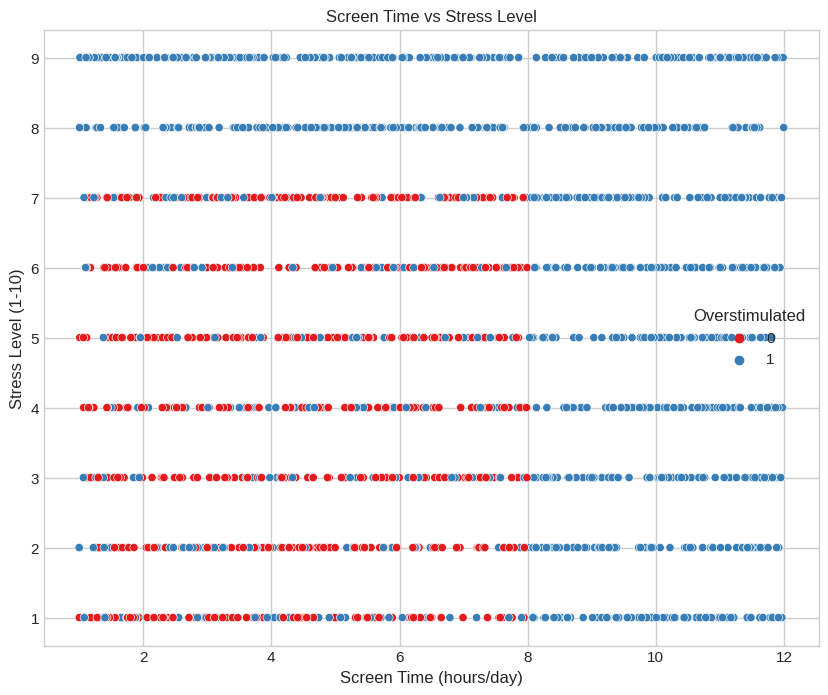

In [25]:
# Analyze relationship between Screen Time, Cognitive Fatigue and Stress Level
print("Analyzing relationship between Screen Time, Stress Level, and Overstimulation...")
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Screen_Time', y='Stress_Level', hue='Overstimulated', data=df, palette='Set1')
plt.title('Screen Time vs Stress Level')
plt.xlabel('Screen Time (hours/day)')
plt.ylabel('Stress Level (1-10)')
plt.show()

*2. What impact does social media usage have on mental health and work efficiency?*

Analyzing relationship between Tech Usage, Anxiety Score, and Overstimulation...


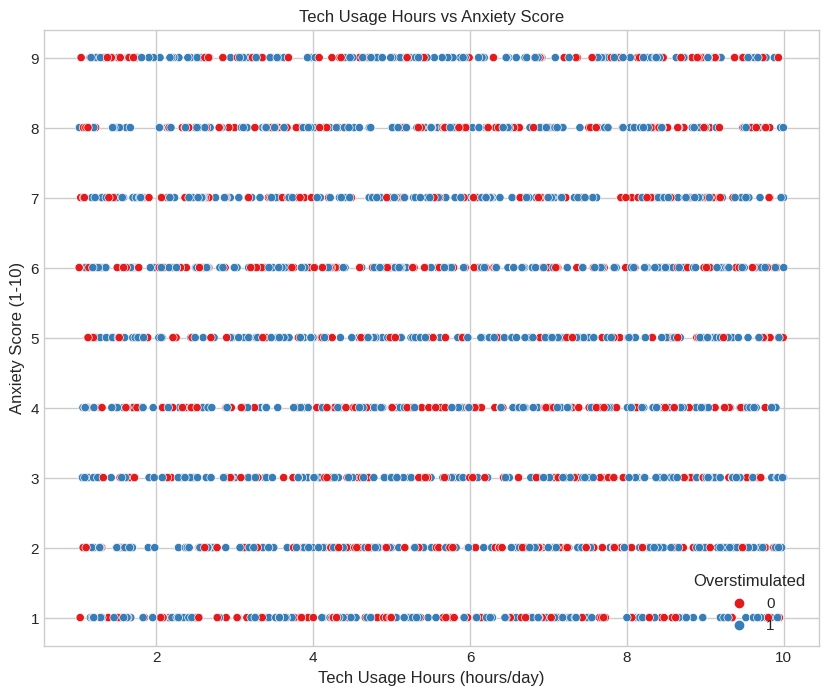

In [26]:
# Analyze relationship between Social Media Usage (Tech_Usage_Hours) and Mental Health (Anxiety_Score)
print("Analyzing relationship between Tech Usage, Anxiety Score, and Overstimulation...")
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Tech_Usage_Hours', y='Anxiety_Score', hue='Overstimulated', data=df, palette='Set1')
plt.title('Tech Usage Hours vs Anxiety Score')
plt.xlabel('Tech Usage Hours (hours/day)')
plt.ylabel('Anxiety Score (1-10)')
plt.show()

*3. Does physical activity play a role in reducing overstimulation effects?*

Analyzing relationship between Exercise Hours and Overstimulation...


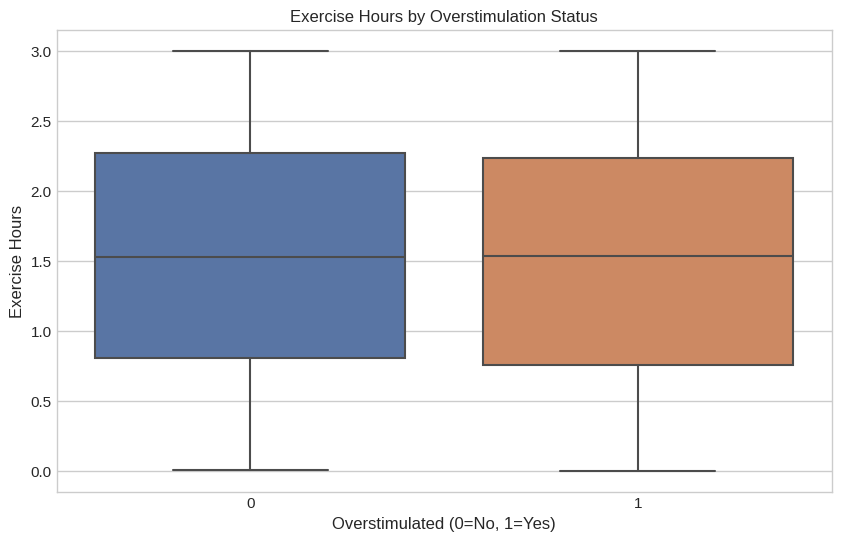

In [27]:
# Analyze relationship between Physical Activity (Exercise_Hours) and Overstimulation
print("Analyzing relationship between Exercise Hours and Overstimulation...")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Overstimulated', y='Exercise_Hours', data=df)
plt.title('Exercise Hours by Overstimulation Status')
plt.xlabel('Overstimulated (0=No, 1=Yes)')
plt.ylabel('Exercise Hours')
plt.show()


*4. Are there significant differences in overstimulation scores based on demographic factors(age, gender)?*


Analyzing overstimulation by age groups...


/tmp/ipykernel_13/1540885609.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_overstimulation = df.groupby('Age_Group')['Overstimulated'].mean() * 100


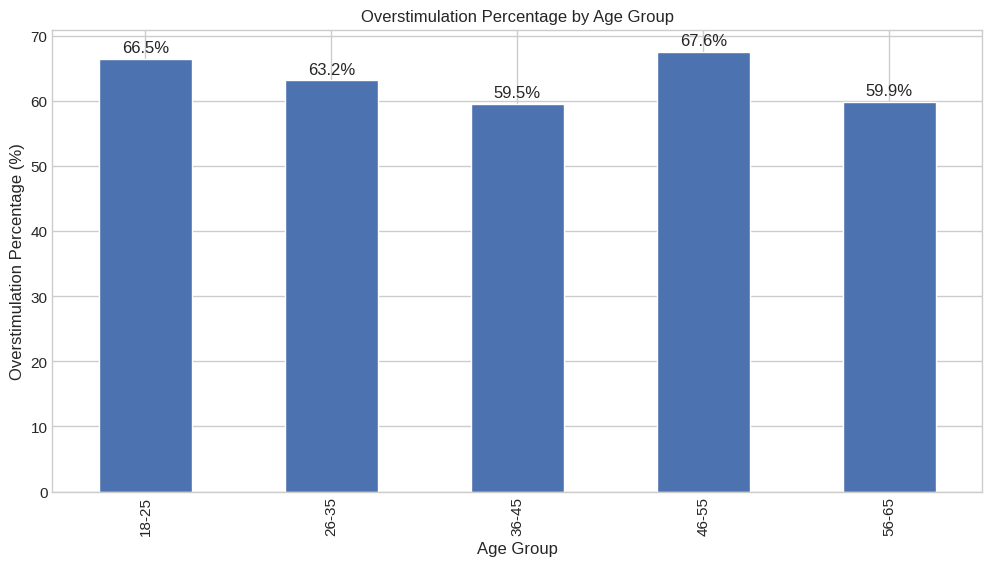

In [28]:
# Analyze differences in overstimulation scores based on demographic factors (age)
print("Analyzing overstimulation by age groups...")
df['Age_Group'] = pd.cut(df['Age'], bins=[17, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
plt.figure(figsize=(12, 6))
age_group_overstimulation = df.groupby('Age_Group')['Overstimulated'].mean() * 100
age_group_overstimulation.plot(kind='bar')
plt.title('Overstimulation Percentage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Overstimulation Percentage (%)')
for i, percentage in enumerate(age_group_overstimulation):
    plt.text(i, percentage + 1, f"{percentage:.1f}%", ha='center')
plt.show()

*5. How do sleep duration and multitasking habits contribute to cognitive fatigue?*

Analyzing relationship between Sleep Duration, Multitasking, and Stress Level...


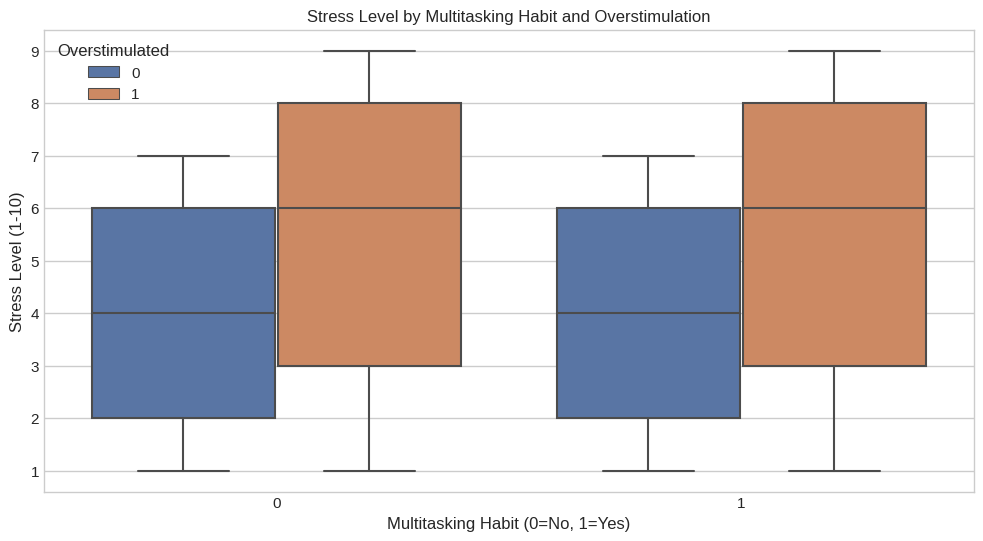

In [29]:
# Analyze relationship between Sleep Duration, Multitasking, and Cognitive Fatigue (using Stress Level as proxy)
print("Analyzing relationship between Sleep Duration, Multitasking, and Stress Level...")
plt.figure(figsize=(12, 6))
sns.boxplot(x='Multitasking_Habit', y='Stress_Level', hue='Overstimulated', data=df)
plt.title('Stress Level by Multitasking Habit and Overstimulation')
plt.xlabel('Multitasking Habit (0=No, 1=Yes)')
plt.ylabel('Stress Level (1-10)')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


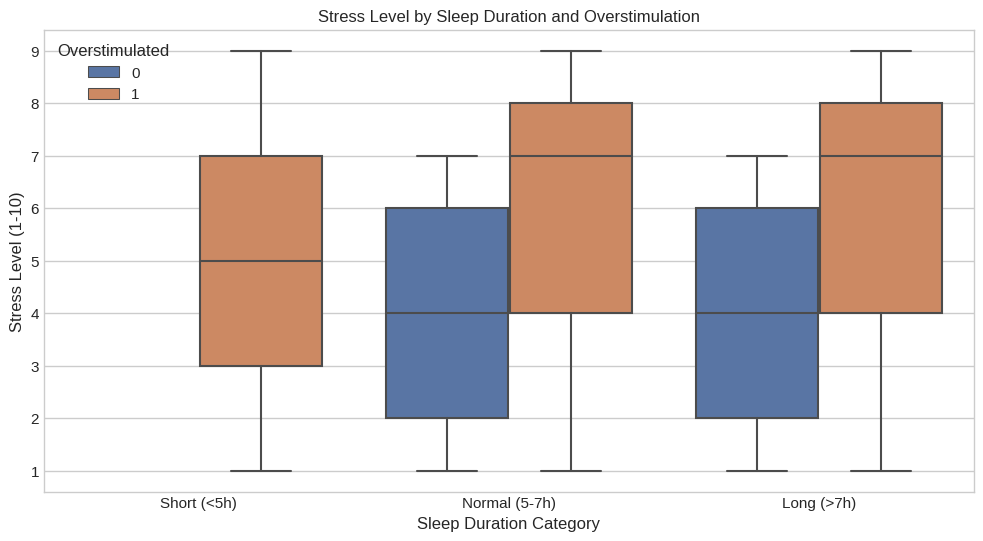

In [30]:
plt.figure(figsize=(12, 6))
df['Sleep_Category'] = pd.cut(df['Sleep_Hours'], bins=[2, 5, 7, 10], labels=['Short (<5h)', 'Normal (5-7h)', 'Long (>7h)'])
sns.boxplot(x='Sleep_Category', y='Stress_Level', hue='Overstimulated', data=df)
plt.title('Stress Level by Sleep Duration and Overstimulation')
plt.xlabel('Sleep Duration Category')
plt.ylabel('Stress Level (1-10)')
plt.show()

# Statistical and Correlation Analysis 

In [31]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (2000, 22)


In [33]:
print("\n Screen Time vs. Cognitive Fatigue and Stress ")

# Calculate correlation between Screen Time and Stress Level
screen_stress_corr = df['Screen_Time'].corr(df['Stress_Level'])
print(f"Correlation between Screen Time and Stress Level: {screen_stress_corr:.3f}")


 Screen Time vs. Cognitive Fatigue and Stress 
Correlation between Screen Time and Stress Level: 0.016


In [34]:
X = sm.add_constant(df['Screen_Time'])
y = df['Stress_Level']
model = sm.OLS(y, X).fit()
print("\nLinear Regression Results (Screen Time vs. Stress Level):")
print(model.summary().tables[1])


Linear Regression Results (Screen Time vs. Stress Level):
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.9047      0.134     36.732      0.000       4.643       5.167
Screen_Time     0.0132      0.019      0.707      0.479      -0.023       0.050


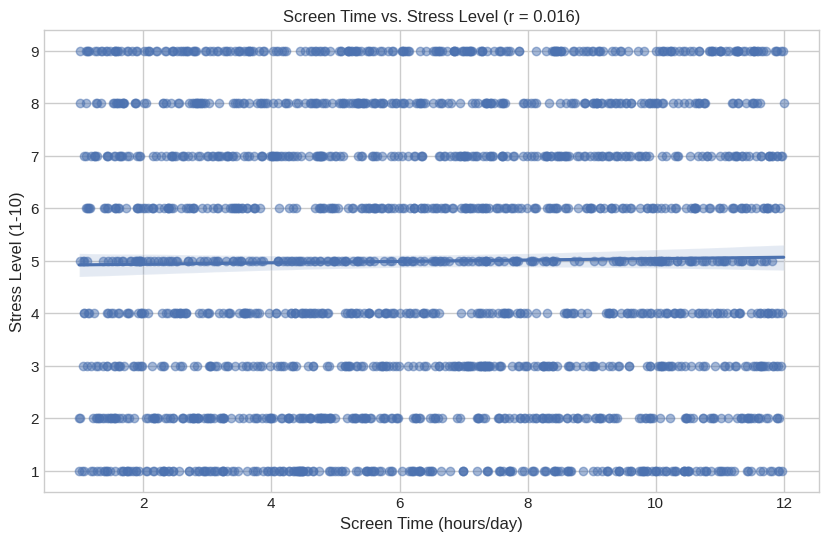

In [35]:
# Create visualization
plt.figure(figsize=(10, 6))
sns.regplot(x='Screen_Time', y='Stress_Level', data=df, scatter_kws={'alpha':0.5})
plt.title(f'Screen Time vs. Stress Level (r = {screen_stress_corr:.3f})')
plt.xlabel('Screen Time (hours/day)')
plt.ylabel('Stress Level (1-10)')
plt.show()

In [36]:
print("\n Social Media Usage vs. Mental Health and Work Efficiency ")

tech_anxiety_corr = df['Tech_Usage_Hours'].corr(df['Anxiety_Score'])
print(f"Correlation between Tech Usage Hours and Anxiety Score: {tech_anxiety_corr:.3f}")

# Linear regression
X = sm.add_constant(df['Tech_Usage_Hours'])
y = df['Anxiety_Score']
model = sm.OLS(y, X).fit()
print("\nLinear Regression Results (Tech Usage Hours vs. Anxiety Score):")
print(model.summary().tables[1])


 Social Media Usage vs. Mental Health and Work Efficiency 
Correlation between Tech Usage Hours and Anxiety Score: -0.012

Linear Regression Results (Tech Usage Hours vs. Anxiety Score):
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.9761      0.138     36.105      0.000       4.706       5.246
Tech_Usage_Hours    -0.0121      0.023     -0.536      0.592      -0.056       0.032


In [37]:
print("\n 3: Physical Activity vs. Overstimulation ")

# Calculate correlation between Exercise Hours and Overstimulation
exercise_overstim_corr = df['Exercise_Hours'].corr(df['Overstimulated'])
print(f"Correlation between Exercise Hours and Overstimulation: {exercise_overstim_corr:.3f}")

# Logistic regression
X = sm.add_constant(df['Exercise_Hours'])
y = df['Overstimulated']
model = sm.Logit(y, X).fit(disp=0)
print("\nLogistic Regression Results (Exercise Hours vs. Overstimulation):")
print(model.summary().tables[1])


 3: Physical Activity vs. Overstimulation 
Correlation between Exercise Hours and Overstimulation: -0.011

Logistic Regression Results (Exercise Hours vs. Overstimulation):
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6030      0.094      6.410      0.000       0.419       0.787
Exercise_Hours    -0.0254      0.054     -0.471      0.638      -0.131       0.080


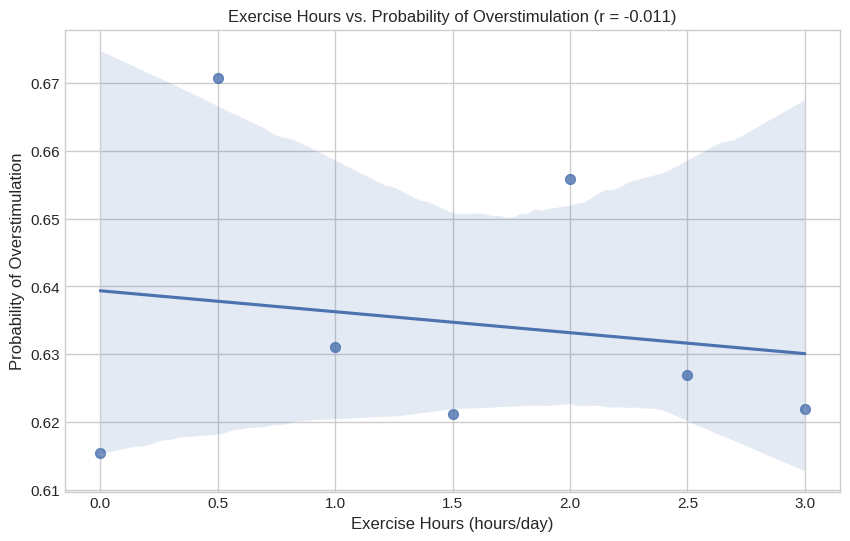

In [38]:
# Create visualization
plt.figure(figsize=(10, 6))
# Group by exercise hours (rounded) and calculate mean overstimulation
exercise_groups = df.copy()
exercise_groups['Exercise_Hours_Rounded'] = np.round(df['Exercise_Hours'] * 2) / 2  # Round to nearest 0.5
grouped = exercise_groups.groupby('Exercise_Hours_Rounded')['Overstimulated'].mean().reset_index()
sns.regplot(x='Exercise_Hours_Rounded', y='Overstimulated', data=grouped, scatter_kws={'s': 50})
plt.title(f'Exercise Hours vs. Probability of Overstimulation (r = {exercise_overstim_corr:.3f})')
plt.xlabel('Exercise Hours (hours/day)')
plt.ylabel('Probability of Overstimulation')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


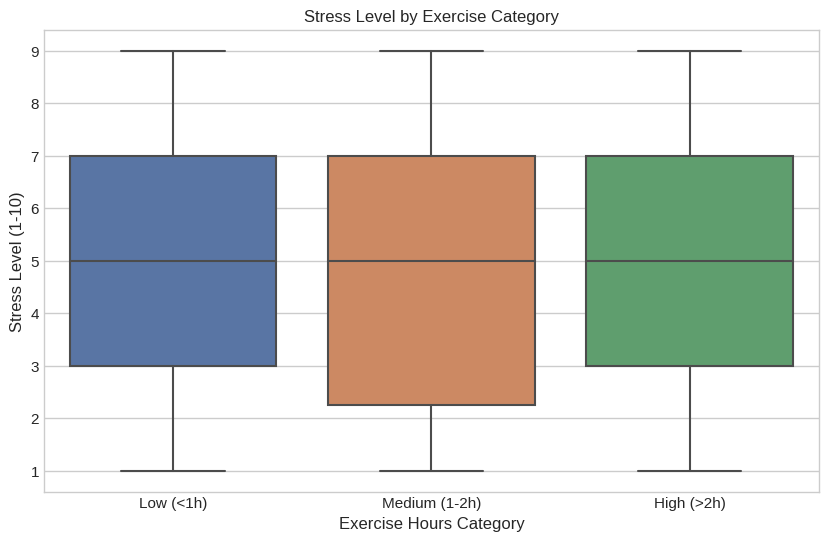

In [39]:
plt.figure(figsize=(10, 6))
df['Exercise_Category'] = pd.cut(df['Exercise_Hours'], bins=[0, 1, 2, 3], labels=['Low (<1h)', 'Medium (1-2h)', 'High (>2h)'])
sns.boxplot(x='Exercise_Category', y='Stress_Level', data=df)
plt.title('Stress Level by Exercise Category')
plt.xlabel('Exercise Hours Category')
plt.ylabel('Stress Level (1-10)')
plt.show()

In [40]:
print("\n 4: Demographic Factors vs. Overstimulation")

# Age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[17, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# Overstimulation percentage by age group
age_overstim = df.groupby('Age_Group')['Overstimulated'].mean() * 100
print("\nOverstimulation Percentage by Age Group:")
print(age_overstim)


 4: Demographic Factors vs. Overstimulation

Overstimulation Percentage by Age Group:
Age_Group
18-25    66.490765
26-35    63.157895
36-45    59.498956
46-55    67.583497
56-65    59.887006
Name: Overstimulated, dtype: float64


/tmp/ipykernel_13/3687005420.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_overstim = df.groupby('Age_Group')['Overstimulated'].mean() * 100


In [41]:
# Chi-square test for age groups and overstimulation
contingency_table = pd.crosstab(df['Age_Group'], df['Overstimulated'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square test for Age Group vs. Overstimulation:")
print(f"Chi2 value: {chi2:.3f}")
print(f"p-value: {p:.3f}")
print(f"Degrees of freedom: {dof}")


Chi-square test for Age Group vs. Overstimulation:
Chi2 value: 9.427
p-value: 0.051
Degrees of freedom: 4


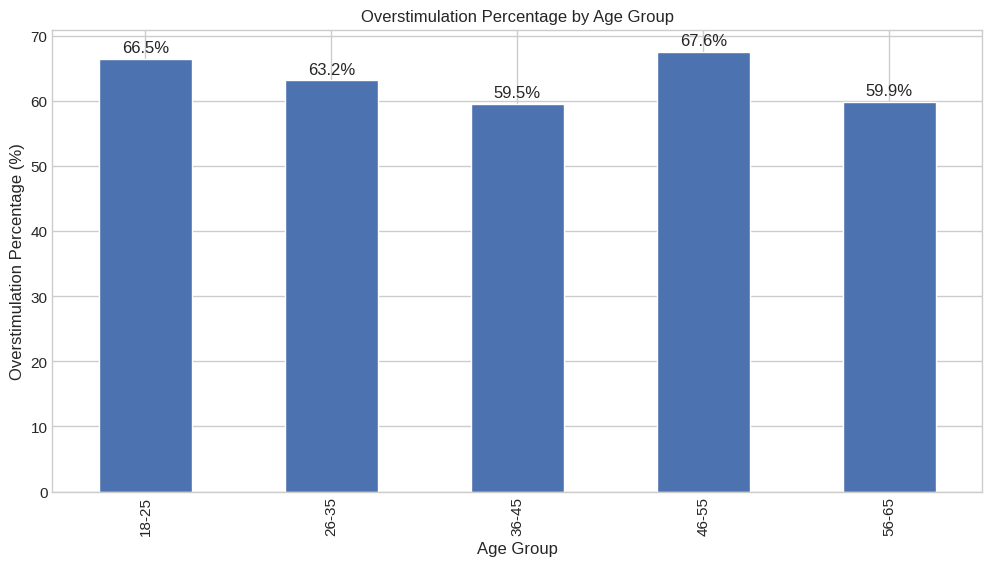

In [42]:
plt.figure(figsize=(12, 6))
age_overstim.plot(kind='bar')
plt.title('Overstimulation Percentage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Overstimulation Percentage (%)')
for i, percentage in enumerate(age_overstim):
    plt.text(i, percentage + 1, f"{percentage:.1f}%", ha='center')
plt.show()

In [43]:
print("\n 5: Sleep Duration and Multitasking vs. Cognitive Fatigue")

# Correlation between Sleep Hours and Stress Level
sleep_stress_corr = df['Sleep_Hours'].corr(df['Stress_Level'])
print(f"Correlation between Sleep Hours and Stress Level: {sleep_stress_corr:.3f}")

# Sleep categories
df['Sleep_Category'] = pd.cut(df['Sleep_Hours'], bins=[2, 5, 7, 10], labels=['Short (<5h)', 'Normal (5-7h)', 'Long (>7h)'])


 5: Sleep Duration and Multitasking vs. Cognitive Fatigue
Correlation between Sleep Hours and Stress Level: -0.020


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0, 0.5, 'Stress Level (1-10)')

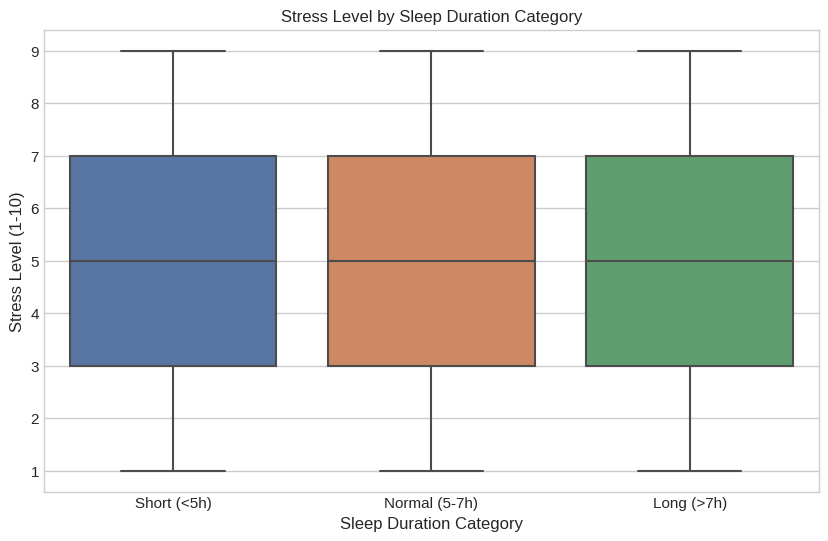

In [44]:
# Comparison on stress levels by sleep category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep_Category', y='Stress_Level', data=df)
plt.title('Stress Level by Sleep Duration Category')
plt.xlabel('Sleep Duration Category')
plt.ylabel('Stress Level (1-10)')

In [45]:
# ANOVA for sleep categories and stress level
sleep_groups = [df[df['Sleep_Category'] == cat]['Stress_Level'] for cat in df['Sleep_Category'].unique()]
f_val, p_val = stats.f_oneway(*sleep_groups)
print(f"\nANOVA test for Sleep Category vs. Stress Level:")
print(f"F-value: {f_val:.3f}")
print(f"p-value: {p_val:.3f}")


ANOVA test for Sleep Category vs. Stress Level:
F-value: 0.863
p-value: 0.422


In [46]:
# Perform t-test for multitasking habit and stress level
multitask_yes = df[df['Multitasking_Habit'] == 1]['Stress_Level']
multitask_no = df[df['Multitasking_Habit'] == 0]['Stress_Level']
t_val, p_val = stats.ttest_ind(multitask_yes, multitask_no)
print(f"\nt-test for Multitasking Habit vs. Stress Level:")
print(f"t-value: {t_val:.3f}")
print(f"p-value: {p_val:.3f}")


t-test for Multitasking Habit vs. Stress Level:
t-value: 0.660
p-value: 0.509


In [47]:
# Two-way ANOVA for sleep category, multitasking, and stress level
formula = 'Stress_Level ~ C(Sleep_Category) + C(Multitasking_Habit) + C(Sleep_Category):C(Multitasking_Habit)'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nTwo-way ANOVA for Sleep Category, Multitasking Habit, and Stress Level:")
print(anova_table)


Two-way ANOVA for Sleep Category, Multitasking Habit, and Stress Level:
                                               sum_sq      df         F  \
C(Sleep_Category)                           11.754109     2.0  0.849719   
C(Multitasking_Habit)                        2.819102     1.0  0.407593   
C(Sleep_Category):C(Multitasking_Habit)     24.570997     2.0  1.776267   
Residual                                 13791.440280  1994.0       NaN   

                                           PR(>F)  
C(Sleep_Category)                        0.427690  
C(Multitasking_Habit)                    0.523267  
C(Sleep_Category):C(Multitasking_Habit)  0.169537  
Residual                                      NaN  


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [48]:
print("\n 6: Lifestyle Factors vs. Overstimulation ")

# Identify key lifestyle factors
lifestyle_factors = ['Sleep_Hours', 'Exercise_Hours', 'Meditation_Habit', 'Screen_Time', 'Tech_Usage_Hours', 'Multitasking_Habit']

# Correlation with overstimulation
lifestyle_corr = df[lifestyle_factors + ['Overstimulated']].corr()['Overstimulated'].drop('Overstimulated').sort_values()
print("\nCorrelation of Lifestyle Factors with Overstimulation:")
print(lifestyle_corr)

# Logistic regression with all lifestyle factors
X = sm.add_constant(df[lifestyle_factors])
y = df['Overstimulated']
model = sm.Logit(y, X).fit(disp=0)
print("\nLogistic Regression Results (Lifestyle Factors vs. Overstimulation):")
print(model.summary().tables[1])


 6: Lifestyle Factors vs. Overstimulation 

Correlation of Lifestyle Factors with Overstimulation:
Sleep_Hours          -0.402738
Meditation_Habit     -0.038604
Exercise_Hours       -0.010532
Multitasking_Habit   -0.002055
Tech_Usage_Hours      0.012978
Screen_Time           0.445316
Name: Overstimulated, dtype: float64

Logistic Regression Results (Lifestyle Factors vs. Overstimulation):
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.3531      0.290      8.106      0.000       1.784       2.922
Sleep_Hours           -0.6487      0.036    -18.121      0.000      -0.719      -0.579
Exercise_Hours         0.0168      0.070      0.241      0.809      -0.120       0.153
Meditation_Habit      -0.1728      0.120     -1.442      0.149      -0.408       0.062
Screen_Time            0.4649      0.024     19.090      0.000       0.417       0.51

# Machine Learning Modeling 

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
from sklearn.inspection import permutation_importance
import joblib

In [50]:
# Features and target variable
# X = df.drop('Overstimulated', axis=1)
X = df.drop(columns=['Overstimulated', 'Age_Group', 'Sleep_Category', 'Exercise_Category'], axis=1)
y = df['Overstimulated']

In [51]:
feature_names = X.columns.tolist()
print(f"Number of features: {len(feature_names)}")
print(f"Features: {feature_names}")

Number of features: 19
Features: ['Age', 'Sleep_Hours', 'Screen_Time', 'Stress_Level', 'Noise_Exposure', 'Social_Interaction', 'Work_Hours', 'Exercise_Hours', 'Caffeine_Intake', 'Multitasking_Habit', 'Anxiety_Score', 'Depression_Score', 'Sensory_Sensitivity', 'Meditation_Habit', 'Overthinking_Score', 'Irritability_Score', 'Headache_Frequency', 'Sleep_Quality', 'Tech_Usage_Hours']


In [52]:
# Training and testing sets
print("\nSplitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Splitting data into training and testing sets...
Training set size: 1600
Testing set size: 400


In [53]:
# Feature Scaling
print("\nScaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Scaling features...


In [54]:
# Scaler for future use
joblib.dump(scaler, '/kaggle/working/scaler.pkl')
print("Scaler saved to ../ml_models/scaler.pkl")


Scaler saved to ../ml_models/scaler.pkl


In [55]:
# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print metrics
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Create classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    
    # If the model can predict probabilities, create ROC curve
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

    # Create precision-recall curve
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
        pr_auc = auc(recall_curve, precision_curve)
        
        plt.figure(figsize=(8, 6))
        plt.plot(recall_curve, precision_curve, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {model_name}')
        plt.legend(loc="lower left")

    # Save the model
    model_filename = f'/kaggle/working/{model_name.lower().replace(" ", "_")}_model.pkl'
    joblib.dump(model, model_filename)
    print(f"Model saved to {model_filename}")
    
    # Return metrics and model
    return {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm,
        'classification_report': report_df
    }

# 1. Logistic Regression Model


 Training Logistic Regression Model 
Cross-validation scores: [0.815625 0.8      0.8125   0.81875  0.84375 ]
Mean CV accuracy: 0.8181

Logistic Regression Performance:
Accuracy: 0.8300
Precision: 0.8707
Recall: 0.8707
F1 Score: 0.8707


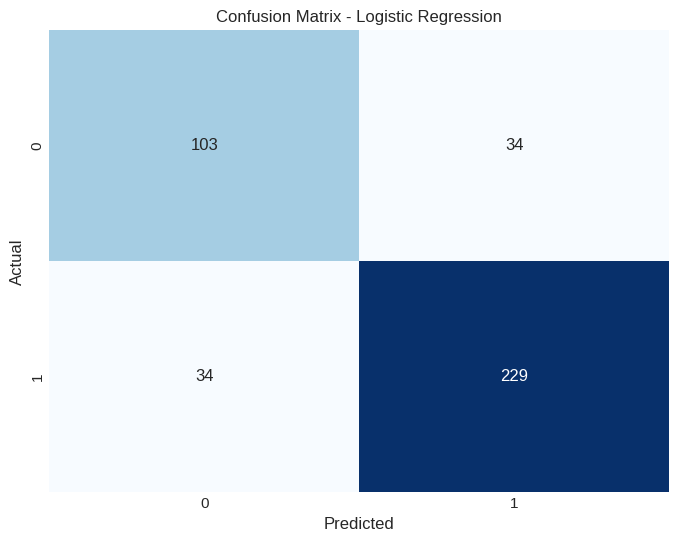

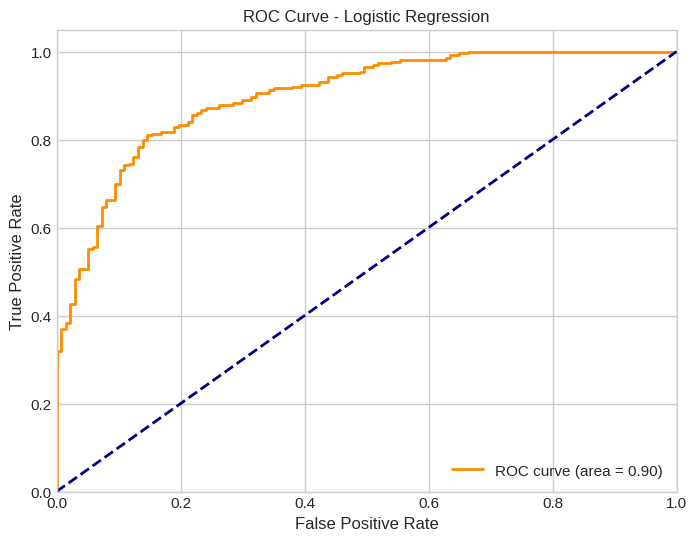

Model saved to /kaggle/working/logistic_regression_model.pkl


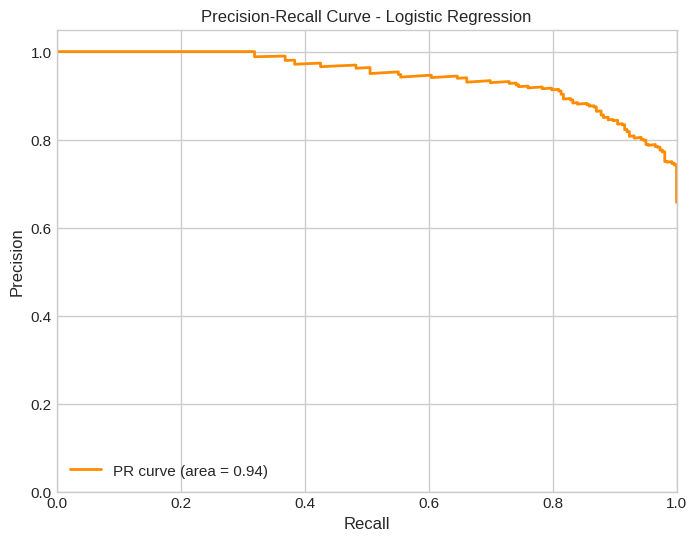

In [56]:
print("\n Training Logistic Regression Model ")
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Cross-validation
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")

# Evaluate the model
log_reg_results = evaluate_model(log_reg, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression")

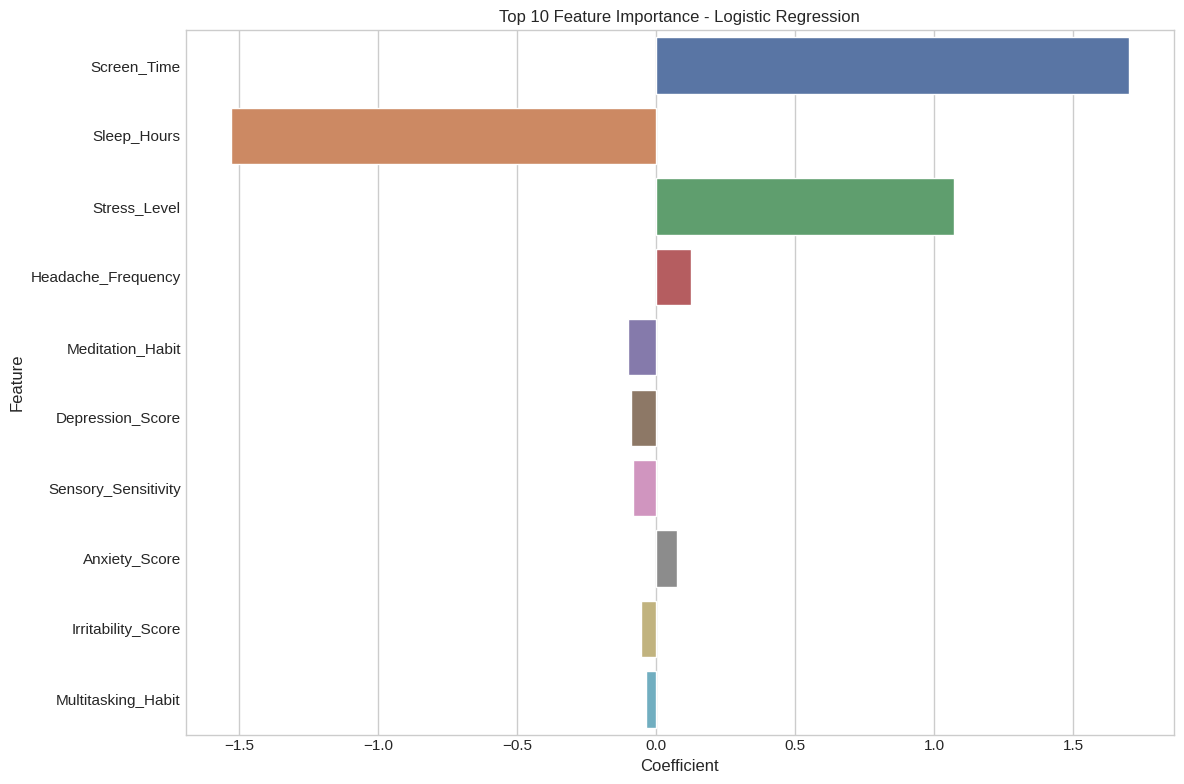

In [57]:
# Feature importance for logistic regression
log_reg_coef = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': log_reg.coef_[0]
})
log_reg_coef['Absolute'] = abs(log_reg_coef['Coefficient'])
log_reg_coef = log_reg_coef.sort_values('Absolute', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=log_reg_coef.head(10))
plt.title('Top 10 Feature Importance - Logistic Regression')
plt.tight_layout()
plt.show()

# 2. Decision Tree Model


 Training Decision Tree Model 
Cross-validation scores: [1.       0.996875 1.       1.       1.      ]
Mean CV accuracy: 0.9994
Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9994

Decision Tree Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


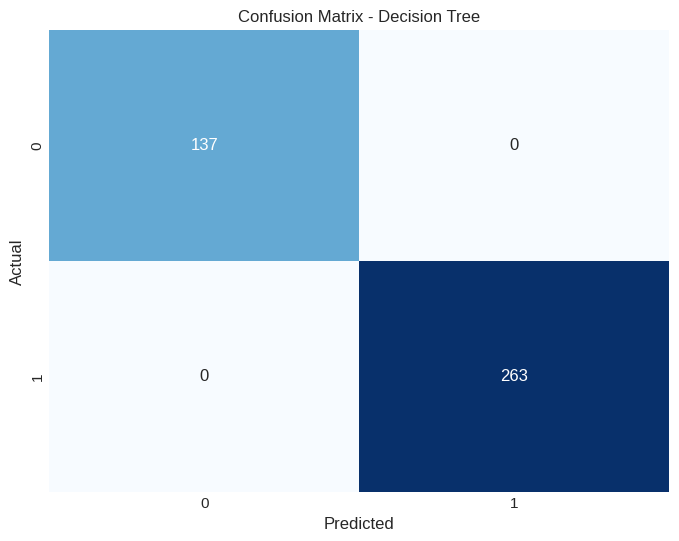

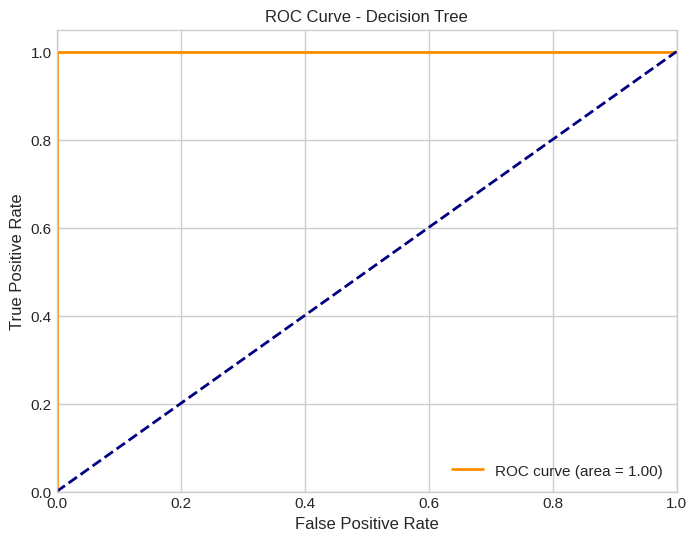

Model saved to /kaggle/working/decision_tree_model.pkl


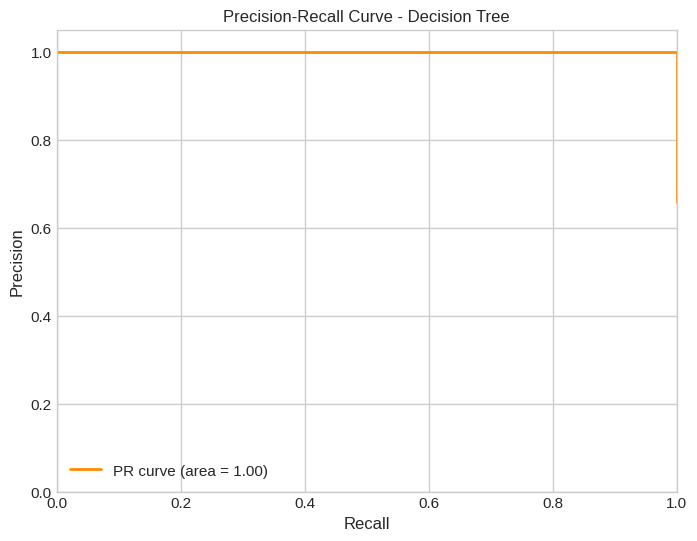

In [58]:
print("\n Training Decision Tree Model ")
dt = DecisionTreeClassifier(random_state=42)

# Cross-validation
cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")

# Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Best model
best_dt = grid_search.best_estimator_

# Evaluate the model
dt_results = evaluate_model(best_dt, X_train, X_test, y_train, y_test, "Decision Tree")

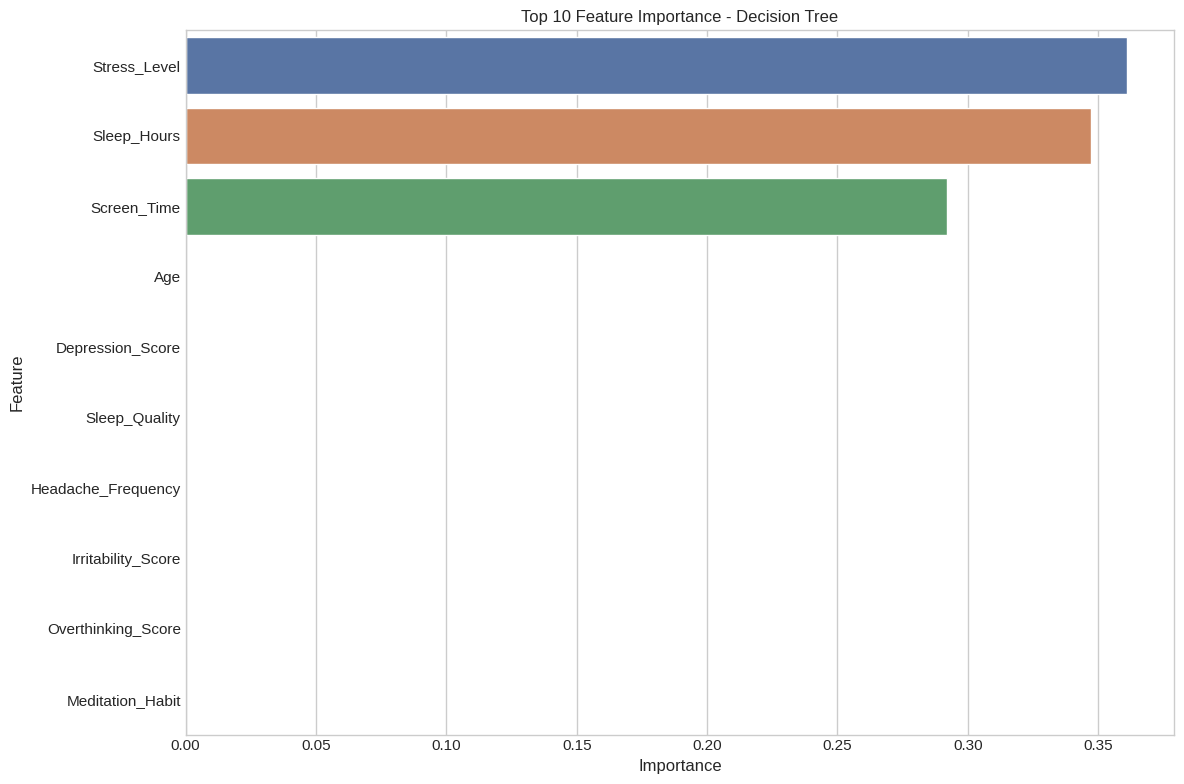

In [59]:
# Feature importance for decision tree
dt_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_dt.feature_importances_
})
dt_importance = dt_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=dt_importance.head(10))
plt.title('Top 10 Feature Importance - Decision Tree')
plt.tight_layout()
plt.show()

# 3. Random Forest Model


 Training Random Forest Model 
Cross-validation scores: [1.       0.996875 0.996875 1.       1.      ]
Mean CV accuracy: 0.9988
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9994

Random Forest Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


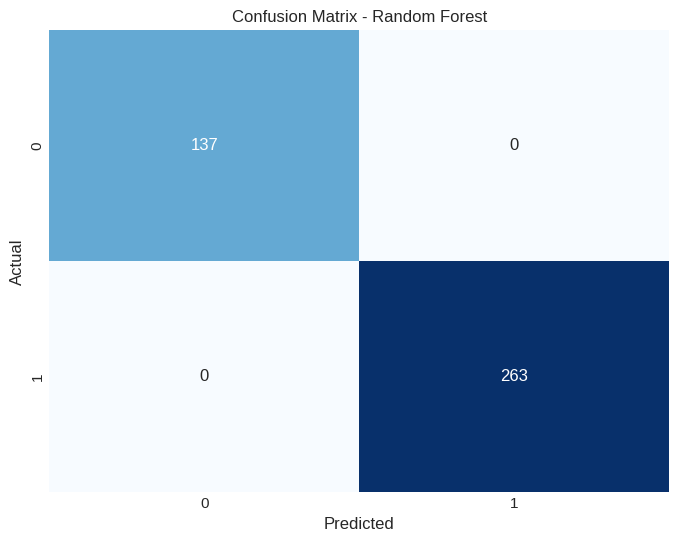

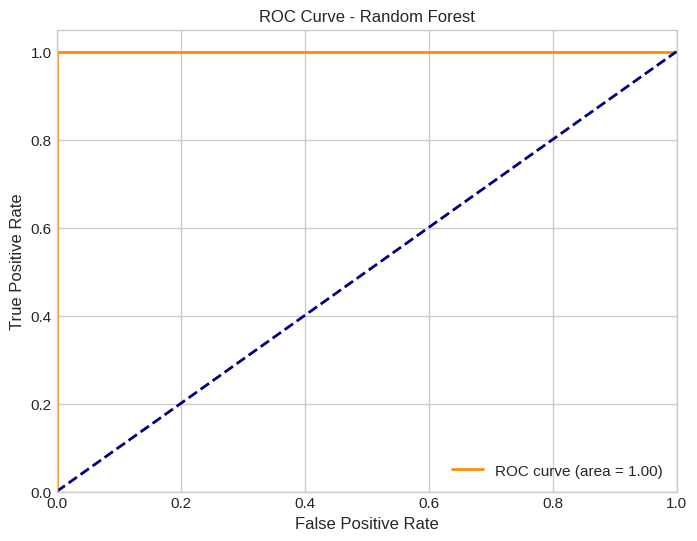

Model saved to /kaggle/working/random_forest_model.pkl


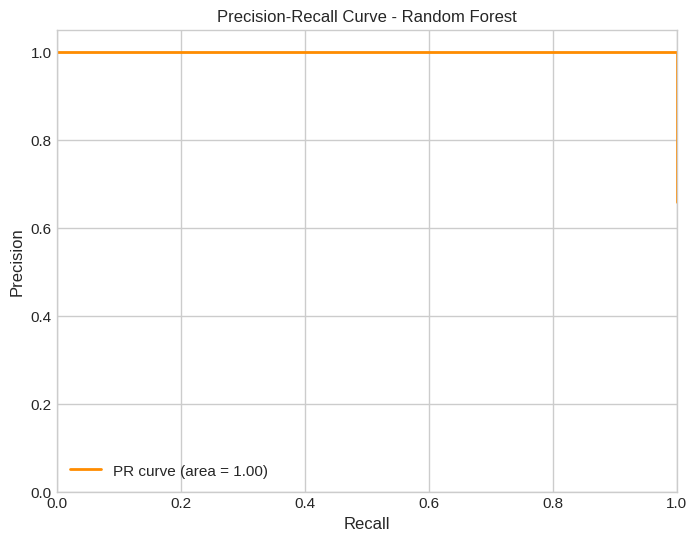

In [60]:
print("\n Training Random Forest Model ")
# Define the model
rf = RandomForestClassifier(random_state=42)

# Cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Best model
best_rf = grid_search.best_estimator_

# Evaluate the model
rf_results = evaluate_model(best_rf, X_train, X_test, y_train, y_test, "Random Forest")


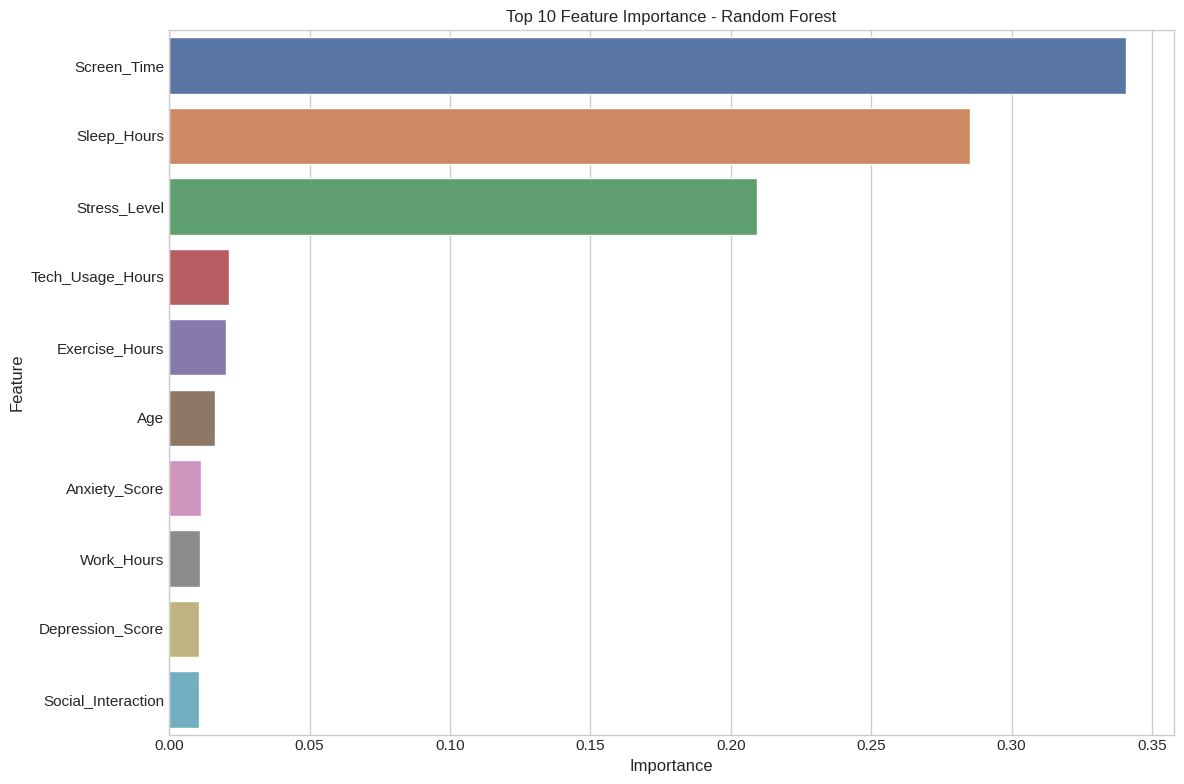

In [61]:
# Feature importance for random forest
rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_rf.feature_importances_
})
rf_importance = rf_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importance.head(10))
plt.title('Top 10 Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

In [62]:
# Compare model performance
print("\n--- Model Comparison ---")
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_scores = [log_reg_results['accuracy'], dt_results['accuracy'], rf_results['accuracy']]
precision_scores = [log_reg_results['precision'], dt_results['precision'], rf_results['precision']]
recall_scores = [log_reg_results['recall'], dt_results['recall'], rf_results['recall']]
f1_scores = [log_reg_results['f1'], dt_results['f1'], rf_results['f1']]

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})
print(comparison_df)


--- Model Comparison ---
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression      0.83   0.870722  0.870722  0.870722
1        Decision Tree      1.00   1.000000  1.000000  1.000000
2        Random Forest      1.00   1.000000  1.000000  1.000000


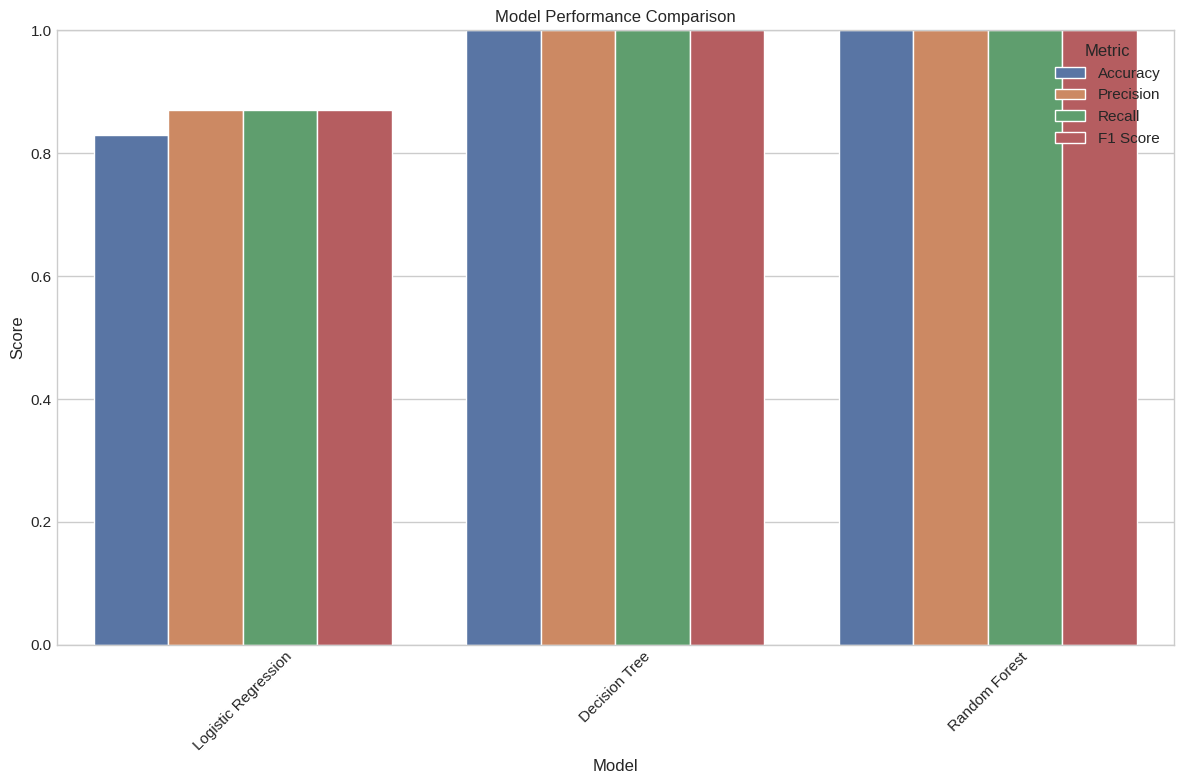

In [63]:
# Visualize model comparison
plt.figure(figsize=(12, 8))
comparison_df_melted = pd.melt(comparison_df, id_vars=['Model'], var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=comparison_df_melted)
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
# Best model based on F1 score
best_model_idx = f1_scores.index(max(f1_scores))
best_model_name = models[best_model_idx]
print(f"\nBest performing model based on F1 score: {best_model_name}")


Best performing model based on F1 score: Decision Tree


**Machine Learning Modeling completed.**
